# Fermi Crab Pulsar / Nebula Flux Ratio
This notebook studies the flux ratio of the Fermi Crab Pulsar and Nebula to find a suitable energy threshold for the joint analysis. The goal is to limit the contamination by the Pulsar, but push the energy threshold as low as possible.  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy import units as u
from astropy.visualization import quantity_support
from gammapy.catalog import SourceCatalog3FGL

In [3]:
fermi_3fgl = SourceCatalog3FGL()

In [4]:
# Crab pulsar 
crab_pulsar = fermi_3fgl['3FGL J0534.5+2201']

# The Crab Nebula has two power-law components see e.g.https://arxiv.org/abs/0911.2412
crab_nebula_i = fermi_3fgl['3FGL J0534.5+2201i']
crab_nebula_s = fermi_3fgl['3FGL J0534.5+2201s']
crab_nebula_spectral_model = crab_nebula_i.spectral_model + crab_nebula_s.spectral_model

In [5]:
EMIN, EMAX = [1, 2000] * u.GeV

emins = np.logspace(np.log10(EMIN.value), np.log10(EMAX.value), 30) * u.GeV
emaxs = EMAX * np.ones(len(emins))

In [6]:
# Compute integral fluxes above various minimal energies
flux_int_crab_pulsar = crab_pulsar.spectral_model.integral(emin=emins.to('MeV'), emax=emaxs.to('MeV'), intervals=True)
flux_int_crab_nebula = crab_nebula_spectral_model.integral(emin=emins.to('MeV'), emax=emaxs.to('MeV'), intervals=True)

# Compute integral flux ratio
flux_int_ratio = (flux_int_crab_pulsar / flux_int_crab_nebula).to('')

We find the energy threshold, where the contaimantion by the pulsar drops below 10%:

In [7]:
ratio_max = 0.1
e_thresh = emins[flux_int_ratio < ratio_max][0]
print('{:.2f}'.format(e_thresh))

30.18 GeV


An finally plot the flux ratio against lower energy threshold:

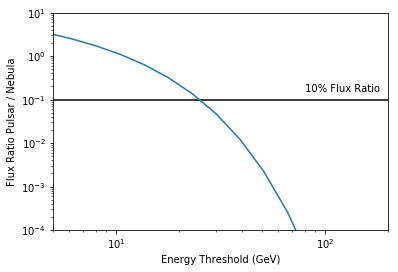

In [8]:
with quantity_support():
    plt.plot(emins, flux_int_ratio)
    plt.loglog()
    plt.xlabel('Energy Threshold (GeV)')
    plt.ylabel('Flux Ratio Pulsar / Nebula')
    plt.hlines(ratio_max, 0.1, 1E3) 
    plt.text(x=0.8E2, y=(1.5 * ratio_max), s='{:.0%} Flux Ratio'.format(ratio_max))
    plt.xlim(5, 2E2)
    plt.ylim(1E-4, 1E1)